In [1]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from matplotlib import pyplot as plt
from tools import utils
import torch
import torch.functional as F

scaler = torch.cuda.amp.GradScaler()

In [2]:
ckpt_pretrained = '../classifier/weights/cifar100/swa'
data_dir = 'data/cifar100'
num_classes = 100
batch_sizes = {
    "train_batch_size": 20,
    'valid_batch_size': 20
}
num_workers = 16
backbone = 'resnet18'
stage = 'first'

transforms = utils.build_transforms(second_stage=(stage == 'second'))
loaders = utils.build_loaders(data_dir, transforms, batch_sizes, num_workers, second_stage=(stage == 'second'))
    

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


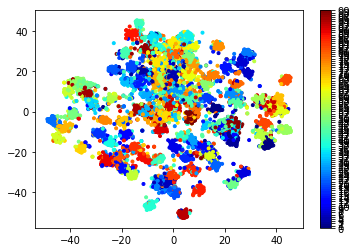

In [7]:
model = utils.build_model(backbone, second_stage=(stage == 'second'), num_classes=num_classes, ckpt_pretrained=ckpt_pretrained).cuda()
model.use_projection_head(False)
model.eval()

embeddings, labels = utils.compute_embeddings(loaders['valid_loader'], model, scaler)
embeddings_tsne = TSNE(n_jobs=num_workers).fit_transform(embeddings)
vis_x = embeddings_tsne[:, 0]
vis_y = embeddings_tsne[:, 1]
plt.scatter(vis_x, vis_y, c=labels, cmap=plt.cm.get_cmap("jet", num_classes), marker='.')
plt.colorbar(ticks=range(num_classes))
plt.show()

In [4]:
embeddings, labels = utils.compute_embeddings(loaders['train_features_loader'], model, scaler)
embeddings_tsne = TSNE(n_jobs=num_workers).fit_transform(embeddings)
vis_x = embeddings_tsne[:, 0]
vis_y = embeddings_tsne[:, 1]
plt.scatter(vis_x, vis_y, c=labels, cmap=plt.cm.get_cmap("jet", num_classes), marker='.')
plt.colorbar(ticks=range(num_classes))
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/ivan/PycharmProjects/supcon_framework/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-d13a7942bb9a>", line 2, in <module>
    embeddings_tsne = TSNE(n_jobs=num_workers).fit_transform(embeddings)
  File "/home/ivan/PycharmProjects/supcon_framework/venv/lib/python3.6/site-packages/MulticoreTSNE/__init__.py", line 139, in fit_transform
    t.join(timeout=1.0)
  File "/usr/lib/python3.6/threading.py", line 1060, in join
    self._wait_for_tstate_lock(timeout=max(timeout, 0))
  File "/usr/lib/python3.6/threading.py", line 1072, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ivan/PycharmProjects/supcon_framework/venv/lib/python3.6/site-packages/IPython/core/interactiveshel

TypeError: object of type 'NoneType' has no len()